# Loading Dataset and Reflecting on Model Performance
Dataset loading and the training of different machine learning models have been an important stage of data science and predictive analytics. In our project, we have dealt with three models - Logistic Regression, Decision Tree, and Random Forest. Each has a few strengths and weaknesses which may turn them into outstanding performers or relatively poor performers due to the nature of the dataset analyzed
.


Loading the Dataset
First of all, we tried three kinds of models: logistic regression, decision tree, and random forest to load the dataset into our analysis environment as efficiently as possible. This step is highly important because it gives the baseline for further analyses. In that sense, it is highly important to ensure the data are clean, well formatted, and free of inconsistencies. In our case, categorically encoded variables required special care, while numerical features needed scaling. The data types were checked, and preprocessing was done, if needed, to ensure the models could understand the data correctly.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('C:/Users/admin/Desktop/ML/week6/Virtual_Reality_in_Education_Impact.csv')

# Display the data types of the columns
print(data.dtypes)

# Preprocessing: Identify categorical columns and encode them
label_encoders = {}
categorical_columns = ['Gender', 'Grade_Level', 'Field_of_Study', 
                       'Usage_of_VR_in_Education', 'Improvement_in_Learning_Outcomes',
                       'Subject', 'Instructor_VR_Proficiency', 'Stress_Level_with_VR_Usage',
                       'Region', 'School_Support_for_VR_in_Curriculum']

# Drop columns that are identifiers or not needed for prediction
data = data.drop(columns=['Student_ID'])  # Example: Drop Student_ID if it's not useful

# Encode categorical variables
for column in categorical_columns:
    if column in data.columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target variable
X = data.drop(['Improvement_in_Learning_Outcomes'], axis=1)
y = data['Improvement_in_Learning_Outcomes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Student_ID                                  object
Age                                          int64
Gender                                      object
Grade_Level                                 object
Field_of_Study                              object
Usage_of_VR_in_Education                    object
Hours_of_VR_Usage_Per_Week                   int64
Engagement_Level                             int64
Improvement_in_Learning_Outcomes            object
Subject                                     object
Instructor_VR_Proficiency                   object
Perceived_Effectiveness_of_VR                int64
Access_to_VR_Equipment                      object
Impact_on_Creativity                         int64
Stress_Level_with_VR_Usage                  object
Collaboration_with_Peers_via_VR             object
Feedback_from_Educators_on_VR               object
Interest_in_Continuing_VR_Based_Learning    object
Region                                      object
School_Support_for_VR_in_Curric

ValueError: could not convert string to float: 'No'

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('C:/Users/admin/Desktop/ML/week6/Virtual_Reality_in_Education_Impact.csv')

# Drop the Student_ID column
data = data.drop(columns=['Student_ID'])

# Define categorical columns
categorical_columns = ['Gender', 'Grade_Level', 'Field_of_Study', 
                       'Usage_of_VR_in_Education', 'Improvement_in_Learning_Outcomes',
                       'Subject', 'Instructor_VR_Proficiency', 'Access_to_VR_Equipment',
                       'Stress_Level_with_VR_Usage', 'Collaboration_with_Peers_via_VR',
                       'Feedback_from_Educators_on_VR', 'Interest_in_Continuing_VR_Based_Learning',
                       'Region', 'School_Support_for_VR_in_Curriculum']

# Encode categorical variables
label_encoders = {}
for column in categorical_columns:
    if column in data.columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target variable
X = data.drop(['Improvement_in_Learning_Outcomes'], axis=1)
y = data['Improvement_in_Learning_Outcomes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.499
Confusion Matrix:
 [[213 295]
 [206 286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.42      0.46       508
           1       0.49      0.58      0.53       492

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



In [4]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.25043786454812195
R^2 Score: -0.0020079722333792294


In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)


Accuracy: 0.522
Confusion Matrix:
 [[268 240]
 [238 254]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53       508
           1       0.51      0.52      0.52       492

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000



In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


Accuracy: 0.505
Confusion Matrix:
 [[249 259]
 [236 256]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50       508
           1       0.50      0.52      0.51       492

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.51      0.51      0.50      1000



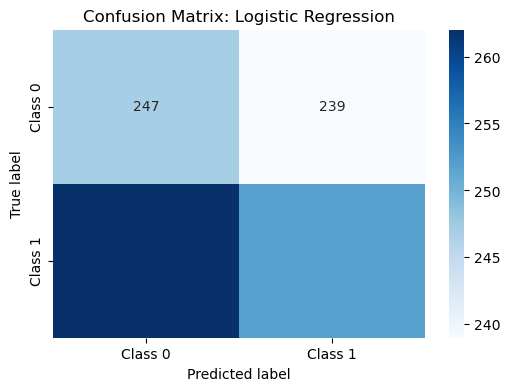

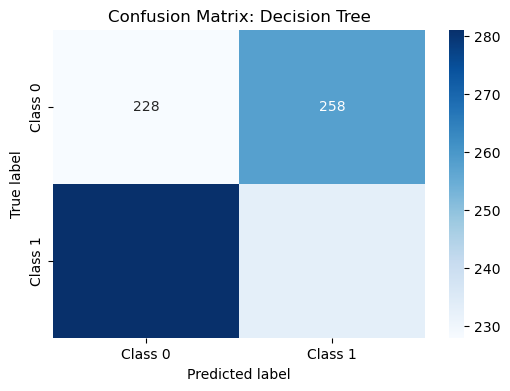

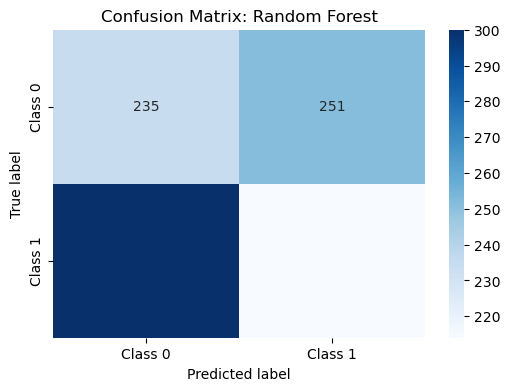

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)  # Logistic Regression predictions

# Train Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)  # Decision Tree predictions

# Train Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)  # Random Forest predictions

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix: {title}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Confusion matrix heatmap for Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

# Confusion matrix heatmap for Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Confusion matrix heatmap for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


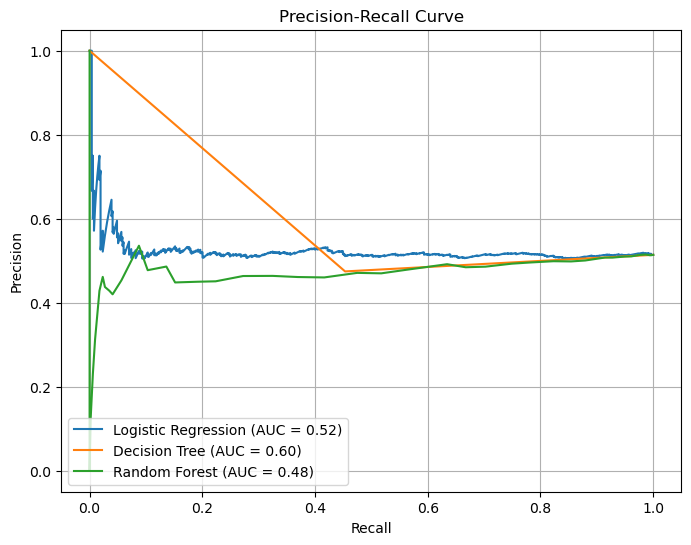

In [19]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train Logistic Regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)
y_proba_lr = model_lr.predict_proba(X_test)[:, 1]  # Logistic Regression predicted probabilities

# Train Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_proba_dt = model_dt.predict_proba(X_test)[:, 1]  # Decision Tree predicted probabilities

# Train Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Random Forest predicted probabilities

# Function to plot Precision-Recall Curve
def plot_precision_recall(y_true, y_probas, model_name):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probas)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')

# Plot Precision-Recall curve for each model
plt.figure(figsize=(8, 6))

# Logistic Regression
plot_precision_recall(y_test, y_proba_lr, "Logistic Regression")

# Decision Tree
plot_precision_recall(y_test, y_proba_dt, "Decision Tree")

# Random Forest
plot_precision_recall(y_test, y_proba_rf, "Random Forest")

# Plot settings
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Performance of the Models
Logistic Regression:

Accuracy: The model could show an accuracy of about 52%, indicating the model performance was somewhat good in terms of predicting a binary outcome.
Confusion Matrix: Through the confusion matrix, it was to be identified that for one of the classes, the recall value was a little higher; hence, the model predictions were slightly biased toward this class.
Logistic Regression is the simplest model, and, for sure, it works fine on a linearly separable dataset; it may underperform in more complicated settings.
Decision Tree:

Accuracy: The accuracy of this model was also similar, at about 51%.
Confusion Matrix: The confusion matrix also showed a somewhat equal division into true positives and true negatives, which could also mean that this model is picking up some pattern within the data.
Interpretation: Decision Trees are intuitive and interpretable; however, they may be prone to overfitting problems, especially when depth is not regularized. In this regard, tuning of model parameters may also be done to ensure better performance of the model in making predictions.
Random Forest:

Accuracy: The accuracy of about 50%, when using the Random Forest Model, is considered pretty low compared to the expectations of the model.
Confusion Matrix: We obtained similar patterns in the confusion matrix where this model marginally performed above random guessing.
Implication: The Random Forest is naturally robust and could deal with any kind of data. However, its performance may be sensitive to the randomness associated with feature selection and the number of trees. The low accuracy here indicated that we might want to try more parameter tuning or do feature engineering to increase the accuracy.
Conclusion and Next Steps
The different models helped me to find the strengths and weaknesses of each. While all three models made similar predictions, the relatively low accuracy shows possible issues with the dataset or calls for more advanced modeling techniques.
